In [1]:
import numpy as np
import hicstraw
import os, sys

sys.path.append('..')
from config.config_sing import *
show_env()

You are in Singularity: singularity_proj_encode_fcc
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log



In [2]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
REDMAP = LinearSegmentedColormap.from_list("bright_red", [(1,1,1),(1,0,0)])
# helper function for plotting
def plot_hic_map(dense_matrix, maxcolor, add_grid=False):
    nr, nc = dense_matrix.shape
    xr = np.arange(nr) 
    xc = np.arange(nc)
    
    plt.matshow(dense_matrix, cmap=REDMAP, vmin=0, vmax=maxcolor)
    if add_grid:
        plt.hlines(xr, 0, nc+1, linestyle='--', linewidth = 0.5, color='grey')
        plt.vlines(xc, 0, nr+1, linestyle='--', linewidth = 0.5, color='grey')
    plt.show()

In [4]:
fdiry = os.path.join(FD_RES, "source", "hic_intact_K562_deep")
fname = "inter.hic"
fpath = os.path.join(fdiry, fname)
hic   = hicstraw.HiCFile(fpath)

In [5]:
print(hic)
print(hic.getGenomeID())
print(hic.getResolutions())

hg38
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10, 1]


- chrX:48500000-49500000
- https://tinyurl.com/2m5hrl6g

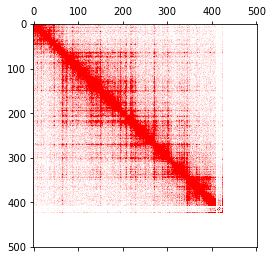

In [6]:
normalization = "NONE"
resolution    = 2000
chrom = "chrX"
x1    = 48500000
y1    = 49500000
x2    = x1 # 48800000
y2    = y1 # 48804000

matrix_object = hic.getMatrixZoomData(
    chrom, 
    chrom, 
    "observed", 
    normalization, 
    "BP", 
    resolution)

matrix_numpy = matrix_object.getRecordsAsMatrix(
    x1,
    y1,
    x2,
    y2
)

plot_hic_map(matrix_numpy, 20)

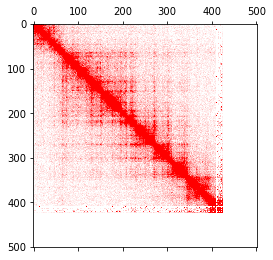

In [7]:
normalization = "RU"
resolution    = 2000
chrom = "chrX"
x1    = 48500000
y1    = 49500000
x2    = x1 # 48800000
y2    = y1 # 48804000

matrix_object = hic.getMatrixZoomData(
    chrom, 
    chrom, 
    "observed", 
    normalization, 
    "BP", 
    resolution)

matrix_numpy = matrix_object.getRecordsAsMatrix(
    x1,
    y1,
    x2,
    y2
)

plot_hic_map(matrix_numpy, 20)